In [1]:
#importing the dataset
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the datset from the sklearn preadded dataset
from sklearn.datasets import load_breast_cancer

In [3]:
#Creating the instance of the data
dataset=load_breast_cancer()

In [4]:
#checking the different keys of our datset
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#converting the dataset into the dataframe 
data=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])

In [6]:
data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


EDA( Exploratory Data Analysis)

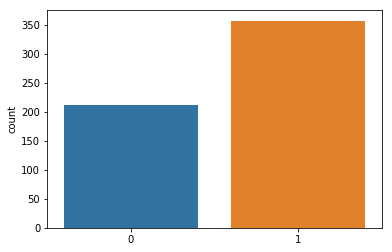

In [7]:
sns.countplot('target',data=dataset)

C:\Users\Vishal\Anaconda3\envs\tensorflow_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


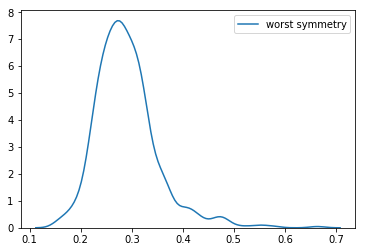

In [8]:
sns.kdeplot(data['worst symmetry'])

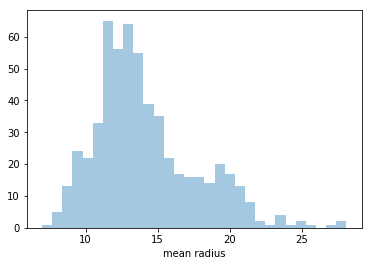

In [9]:
sns.distplot(data['mean radius'],kde=False,bins=30)

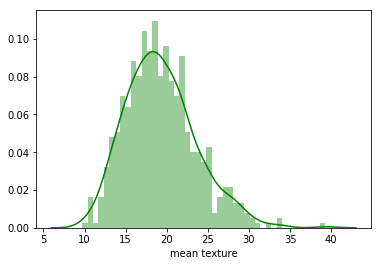

In [10]:
sns.distplot(data['mean texture'],kde=True,bins=45,color='green')

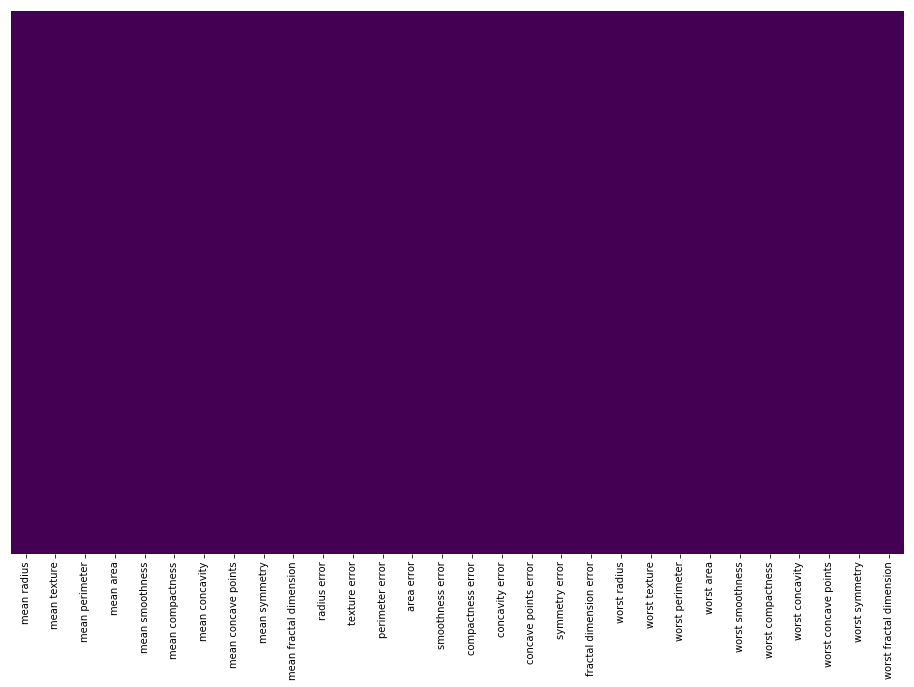

In [11]:
#Checking for any missing value or null value
fig=plt.subplots(figsize=(16,10))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [12]:
#Diving the data into x and y for training the model
#X-Contains the features on which the model will classify the type of breast cancer
#y-contains the original classifications
X=data
y=dataset['target']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
#feature Scaling
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 

Using TensorFlow backend.


In [19]:
#Intialising the ANN Model
model=Sequential()

In [20]:
#Adding the first hidden layer of our ANN Model
#units-Number of nodes we want to add in our hidden layer.
#kernel_intializer-The function is used to intialise the weights.
#input_dim=Number of nodes in the input layer
#activation=The Activation Function
#Dropout function is used to avoid overfitting 
model.add(Dense(units=15,kernel_initializer='uniform',activation='relu',input_dim=30))
model.add(Dropout(0.2))

In [21]:
#Adding the Second hidden layer of our ANN Model
model.add(Dense(units=15,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))

In [22]:
#Adding the output layer of our ANN Model
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

In [23]:
#Compiling the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#fitting the model to our dataset and specifying the number of batch_size and epochs
model.fit(X_train,y_train,epochs=100,batch_size=10)

Epoch 1/100
381/381 [==============================] - 1s 1ms/step - loss: 0.6839 - acc: 0.8189
Epoch 2/100
381/381 [==============================] - 0s 253us/step - loss: 0.5728 - acc: 0.9344
Epoch 3/100
381/381 [==============================] - 0s 315us/step - loss: 0.3208 - acc: 0.9370
Epoch 4/100
381/381 [==============================] - 0s 236us/step - loss: 0.1704 - acc: 0.9501
Epoch 5/100
381/381 [==============================] - 0s 184us/step - loss: 0.1306 - acc: 0.9554
Epoch 6/100
381/381 [==============================] - 0s 209us/step - loss: 0.1068 - acc: 0.9764
Epoch 7/100
381/381 [==============================] - 0s 198us/step - loss: 0.0921 - acc: 0.9764
Epoch 8/100
381/381 [==============================] - 0s 213us/step - loss: 0.0874 - acc: 0.9738
Epoch 9/100
381/381 [==============================] - 0s 210us/step - loss: 0.0820 - acc: 0.9790
Epoch 10/100
381/381 [==============================] - 0s 184us/step - loss: 0.0789 - acc: 0.9790
Epoch 11/100
381/381 

381/381 [==============================] - 0s 179us/step - loss: 0.0203 - acc: 0.9948
Epoch 84/100
381/381 [==============================] - 0s 283us/step - loss: 0.0215 - acc: 0.9895
Epoch 85/100
381/381 [==============================] - 0s 208us/step - loss: 0.0185 - acc: 0.9948
Epoch 86/100
381/381 [==============================] - 0s 239us/step - loss: 0.0196 - acc: 0.9948
Epoch 87/100
381/381 [==============================] - 0s 131us/step - loss: 0.0181 - acc: 0.9921
Epoch 88/100
381/381 [==============================] - 0s 155us/step - loss: 0.0210 - acc: 0.9948
Epoch 89/100
381/381 [==============================] - 0s 212us/step - loss: 0.0250 - acc: 0.9921
Epoch 90/100
381/381 [==============================] - 0s 236us/step - loss: 0.0130 - acc: 0.9948
Epoch 91/100
381/381 [==============================] - 0s 185us/step - loss: 0.0178 - acc: 0.9921
Epoch 92/100
381/381 [==============================] - 0s 104us/step - loss: 0.0159 - acc: 0.9921
Epoch 93/100
381/381 [=

In [25]:
#making prediction of our model
prediction=model.predict(X_test)

In [26]:
#Evaluating the performance of our model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
prediction=(prediction>0.5)

In [28]:
#Confusion Matrix
confusion_matrix(y_test,prediction)

array([[ 70,   3],
       [  2, 113]], dtype=int64)

In [29]:
#Classifiaction Report 
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        73
           1       0.97      0.98      0.98       115

   micro avg       0.97      0.97      0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [30]:
#Accuracy of our Model
accuracy_score(y_test,prediction)

0.973404255319149